# 10.05 ~ 10.09 과제
### 1. 2015 ~ 2022 페런트레이스 결과 도출
- SSG wire to wire 우승 분석하기 위해서 반드시 필요함
- 역대 다른 우승팀들의 우승과정은 어떠했는지 대조하면서 분석할 예정임.
- 2015년으로 잡은 이유: 10구단 창단 후 일정 변화가 잦았기도 했고, 무엇보다 경기수가 10개 구단을 기점으로 144경기로 고정하여 진행되었기 때문에 2015년으로 잡기로 함
### 2. 2022 시즌 SSG 선수들의 일자별 경기 결과 도출하기
- 구체적일수록 좋음
- 구체적인 것의 기준이, 타석, 결과, 당시 상황(1사 1,2루였다 혹은 2사 만루였다 이런 식으로)을 설명할 수 있는 데이터를 얻어낼 것

## 1. 2015 ~ 2022 페런트레이스 결과 도출
- 고민거리: 개막일정을 리스트로 적어놓는게 맞나? 아니면 개막전이라는 걸 확인시킬 다른 방법이 없는건가?

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import natsort
from datetime import date, datetime
from matplotlib import rc

rc('font', family='AppleGothic')
plt.rcParams['axes.unicode_minus']= False
from IPython.core.display_functions import display

In [2]:
year_list = [int(year) for year in range(2015, 2023)]
team_list = ["LG", "SSG", "KT", "NC", "두산", "키움", "한화", "KIA", "삼성", "롯데"]
color_list=["#DB1916", "#fff000", "#000000", "#C79F79", "#000066", "#660066", "#FF7F00", "#ff0000","#0000ff", "#330066"]
open_race = {
    2015:(3,28),
    2016:(4,1),
    2017:(3,31),
    2018:(3,24),
    2019:(3,23),
    2020:(5,5),
    2021:(4,3),
    2022:(4,2)
}

close_race = {
    2015:(10,6), #지상파 중계를 안하는바람에 실수
    2016:(10,9),
    2017:(10,3),
    2018:(10,14),
    2019:(10,1),
    2020:(10,31),
    2021:(10,31), #타이브레이크. 정규시즌은 1030
    2022:(10,10)
}

In [3]:
for year in year_list:
    os.makedirs("./re_date/{}".format(year)) #있으면 만들어라 하고 없으면 만들지 마라고 할 수 있는데, 까먹었다 ㅋㅋㅋㅋㅋㅋㅋㅋ ㅈㅅ;;
    op_mon, op_day = open_race[year]
    cl_mon, cl_day = close_race[year]
    month_list = [int(month) for month in range(op_mon, cl_mon+1)]
    print(year)
    for m, month in enumerate(month_list):
        url = "https://sports.news.naver.com/kbaseball/schedule/index?month={}&year={}".format(month,year)
        df = pd.read_html(url)
        for d in range(1, len(df)-1):
            if df[d][2][0] == "프로야구 경기가 없습니다.":
                continue
            if (m==0 and d<op_day):
                continue
            if (m==len(month_list)-1 and d>cl_day):
                break
            remain = df[d].loc[:, [0,1,2,3,4,5]]
            remain.rename(columns={0:"일자", 1:"시각", 2:"경기결과", 4:"중계사", 5:"구장"} , inplace=True)
            text = remain["일자"][0].split()[0]
            remain["일자"] = text
            remain.to_csv("./re_date/{}/{}.csv".format(year, text), header=True, encoding='UTF-8', index=False)
        print(month, "완료")

2015
3 완료
4 완료
5 완료
6 완료
7 완료
8 완료
9 완료
10 완료
2016
4 완료
5 완료
6 완료
7 완료
8 완료
9 완료
10 완료
2017
3 완료
4 완료
5 완료
6 완료
7 완료
8 완료
9 완료
10 완료
2018
3 완료
4 완료
5 완료
6 완료
7 완료
8 완료
9 완료
10 완료
2019
3 완료
4 완료
5 완료
6 완료
7 완료
8 완료
9 완료
10 완료
2020
5 완료
6 완료
7 완료
8 완료
9 완료
10 완료
2021
4 완료
5 완료
6 완료
7 완료
8 완료
9 완료
10 완료
2022
4 완료
5 완료
6 완료
7 완료
8 완료
9 완료
10 완료


In [4]:
init_data = [0,0,0,0,0,0]


In [5]:
for year in year_list:
    KBO_team = pd.DataFrame(columns=["경기수", "승리", "무승부", "패배", "득점", "실점"], index=team_list)
    os.makedirs("./re_rank/{}".format(year))
    for team in team_list:
        KBO_team.loc[team] = init_data

    order_list=os.listdir("./re_date/{}".format(year))
    sorted_list = natsort.natsorted(order_list)

    for file in sorted_list:
        data = pd.read_csv("./re_date/{}/{}".format(year, file))
        for i in data.index:
            line = data.loc[i, :]

            if len(line[2].split(":")) == 1:
                continue

            away, home = line[2].split(":")
            home = home.split()
            away = away.split()
            h_score, h_team = home
            a_team, a_score = away

            h_team = h_team.upper()
            a_team = a_team.upper()

            if h_team == "나눔" or a_team == "나눔":
                continue
            if h_team == "SK":
                h_team = "SSG"
            elif a_team == "SK":
                a_team = "SSG"
            if h_team == "넥센":
                h_team = "키움"
            elif a_team == "넥센":
                a_team = "키움"


            h_score = int(h_score)
            a_score = int(a_score)

            KBO_team.loc[h_team, ["득점"]] += h_score
            KBO_team.loc[h_team, ["실점"]] += a_score
            KBO_team.loc[a_team, ["득점"]] += a_score
            KBO_team.loc[a_team, ["실점"]] += h_score

            #리팩토링은 항상 모두 완료하고나서 할 것
            if h_score > a_score: #홈팀 승리
                KBO_team.loc[h_team, ["승리"]] +=1
                KBO_team.loc[a_team, ["패배"]] +=1
            elif h_score < a_score:
                KBO_team.loc[a_team, ["승리"]] +=1
                KBO_team.loc[h_team, ["패배"]] +=1
            else:
                KBO_team.loc[h_team, ["무승부"]] +=1
                KBO_team.loc[a_team, ["무승부"]] +=1

            KBO_team["경기수"] = KBO_team["승리"] + KBO_team["패배"] + KBO_team["무승부"]
            KBO_team["승점"] = (144-KBO_team["경기수"])*0.5 + KBO_team["승리"] + KBO_team["무승부"]*0.5
            KBO_team["게임차"] = KBO_team["승점"][0] - KBO_team["승점"]
            KBO_team.sort_values(by="승점", inplace=True, ascending=False)
            KBO_team["순위"] = KBO_team["승점"].rank(method="min", ascending=False).astype('int')

            KBO_team.to_csv("./re_rank/{}/{}".format(year, file), header=True, encoding='UTF-8', index=True)


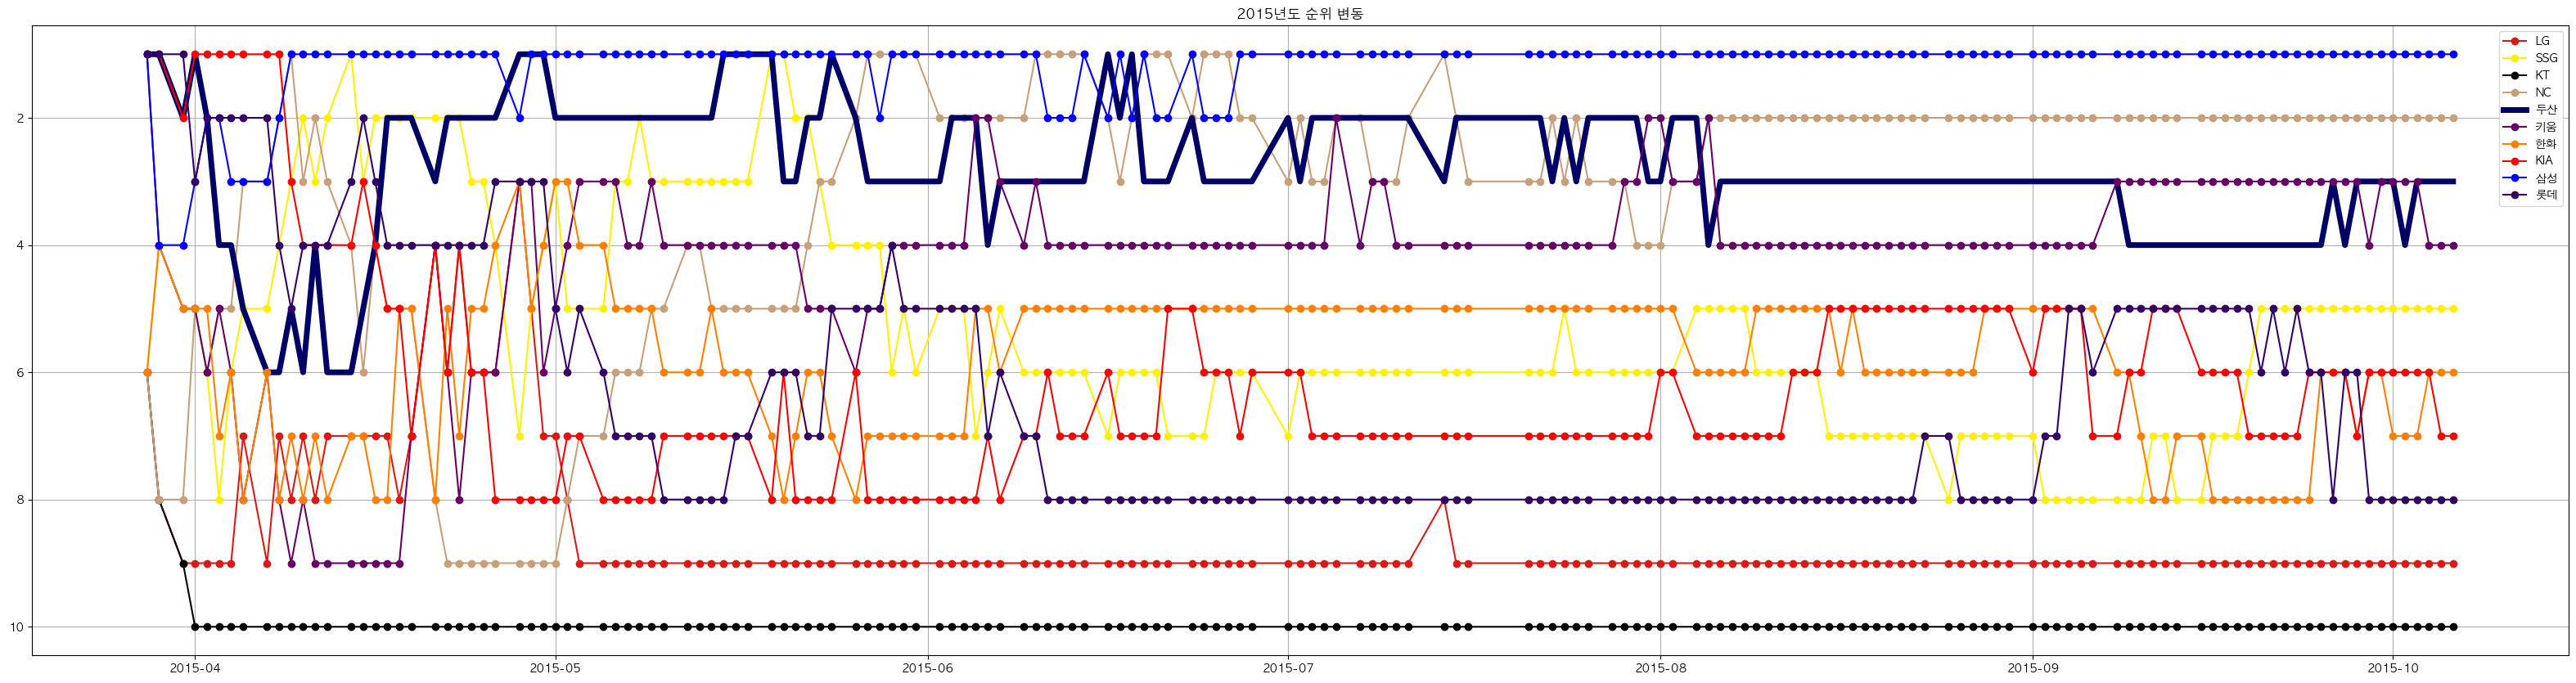

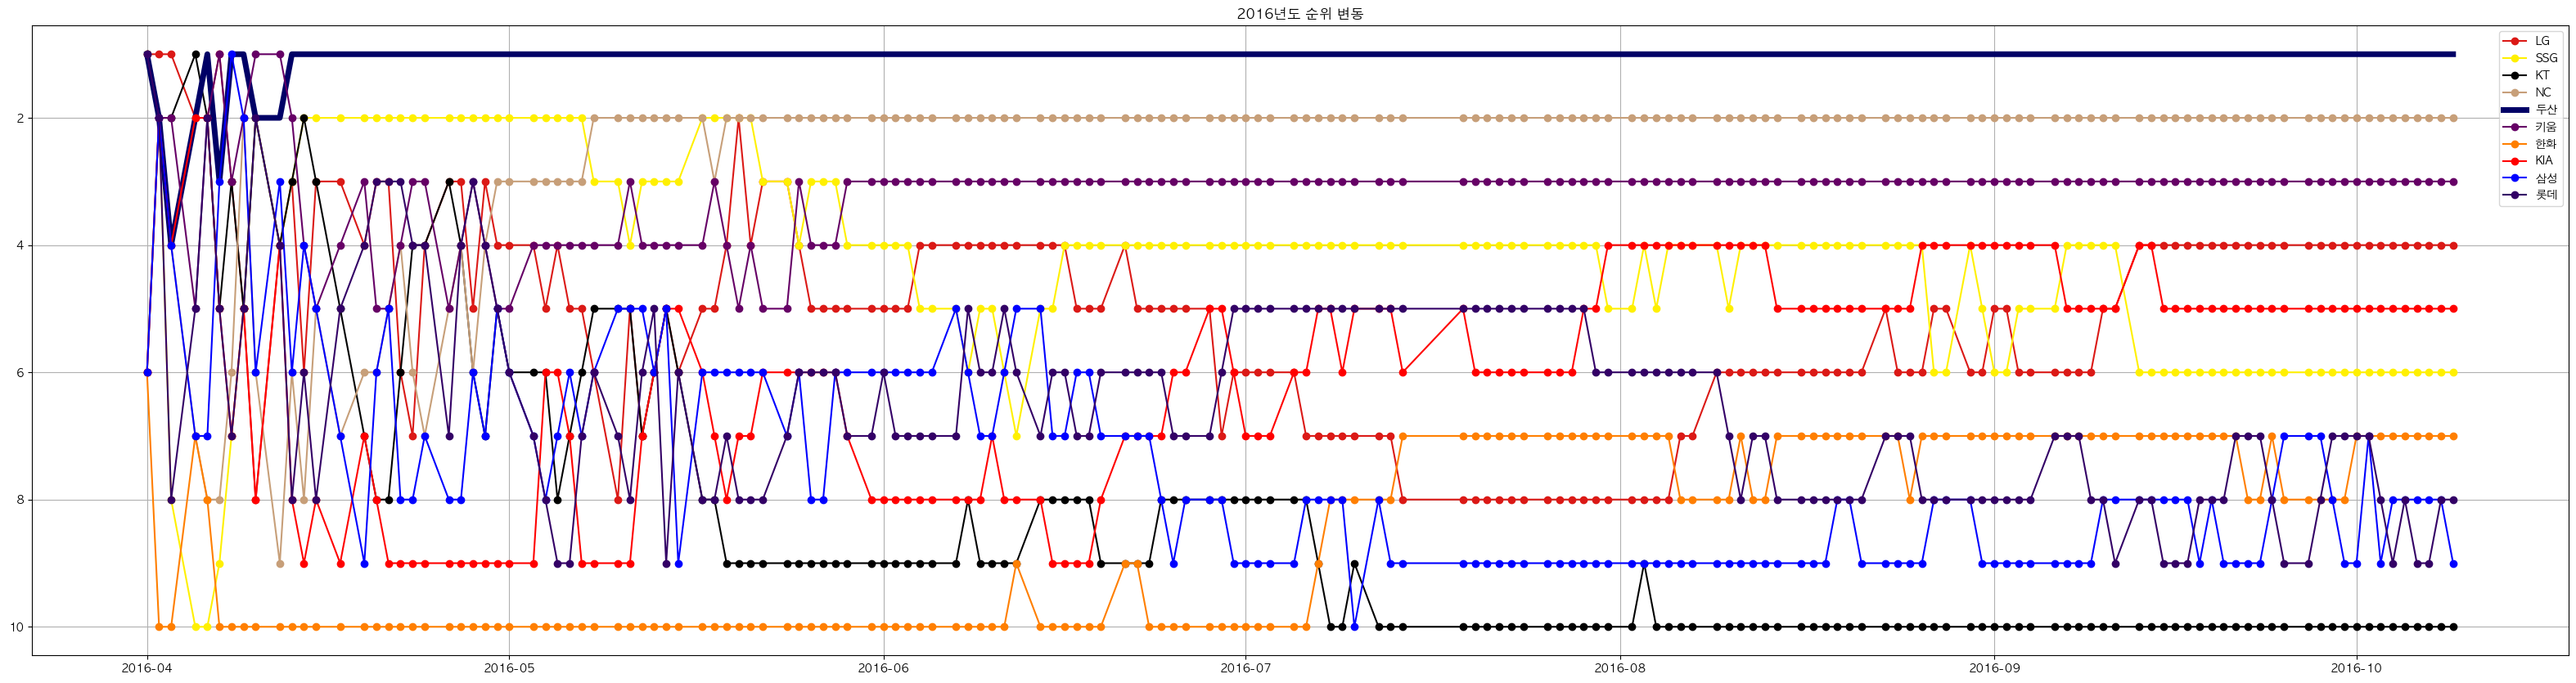

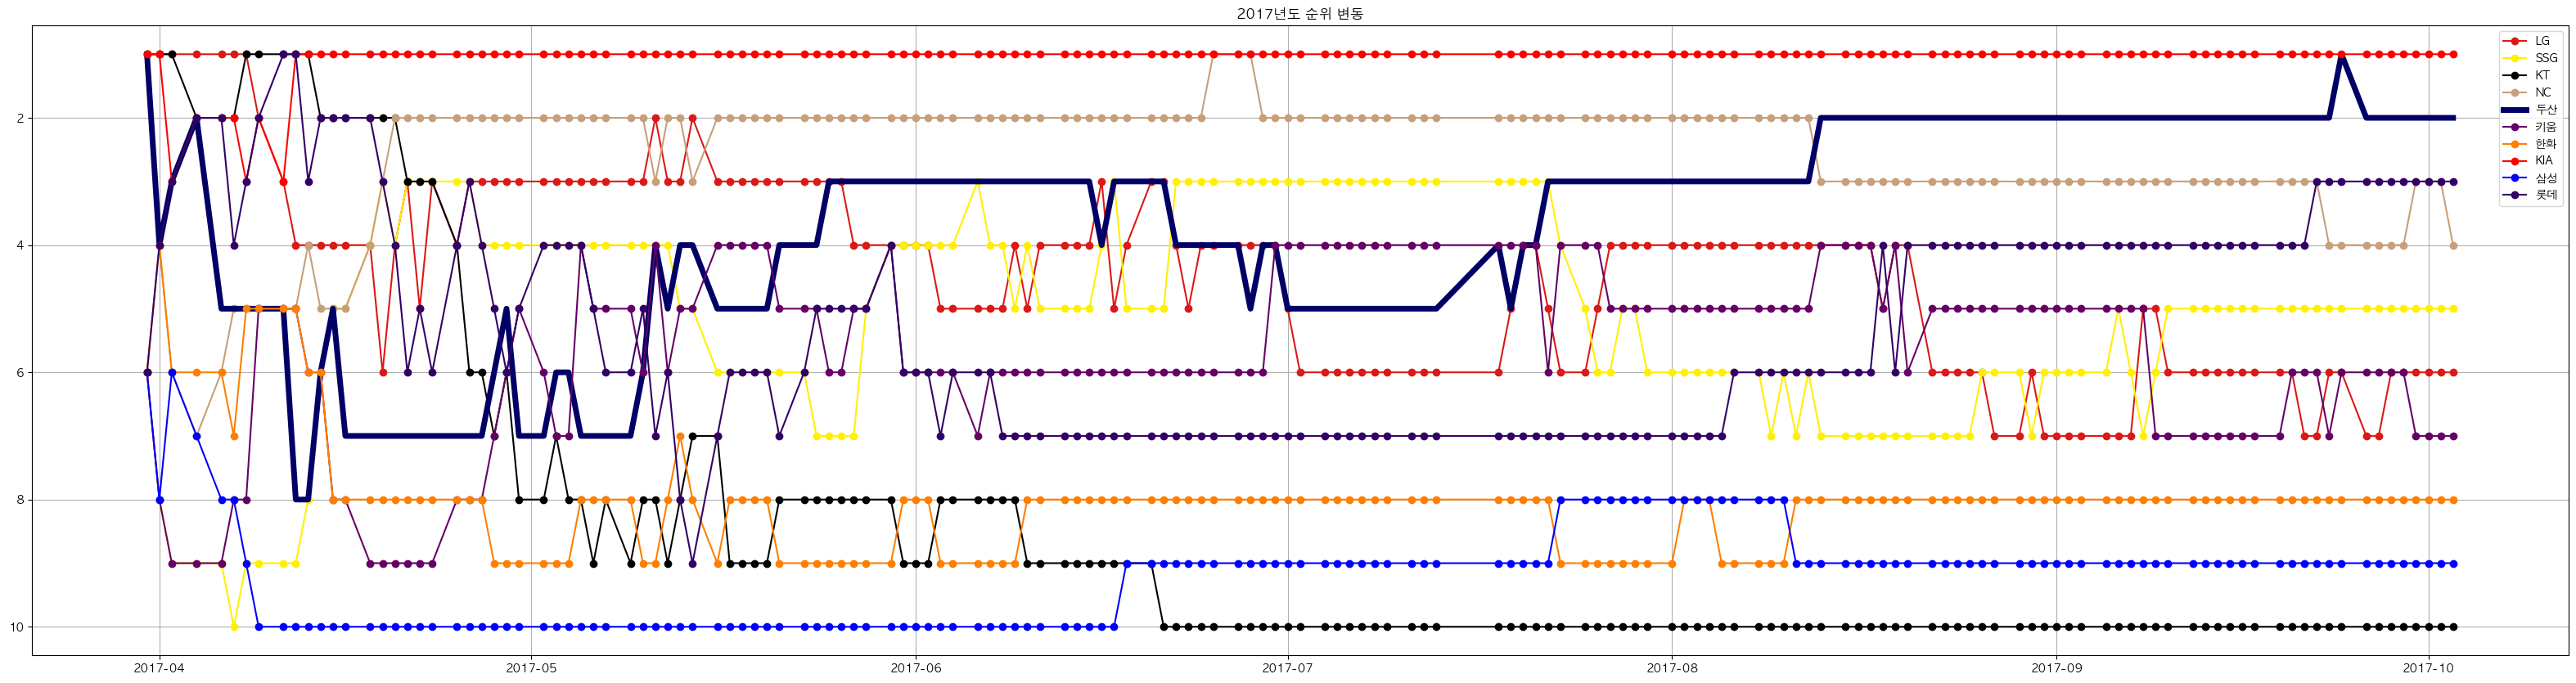

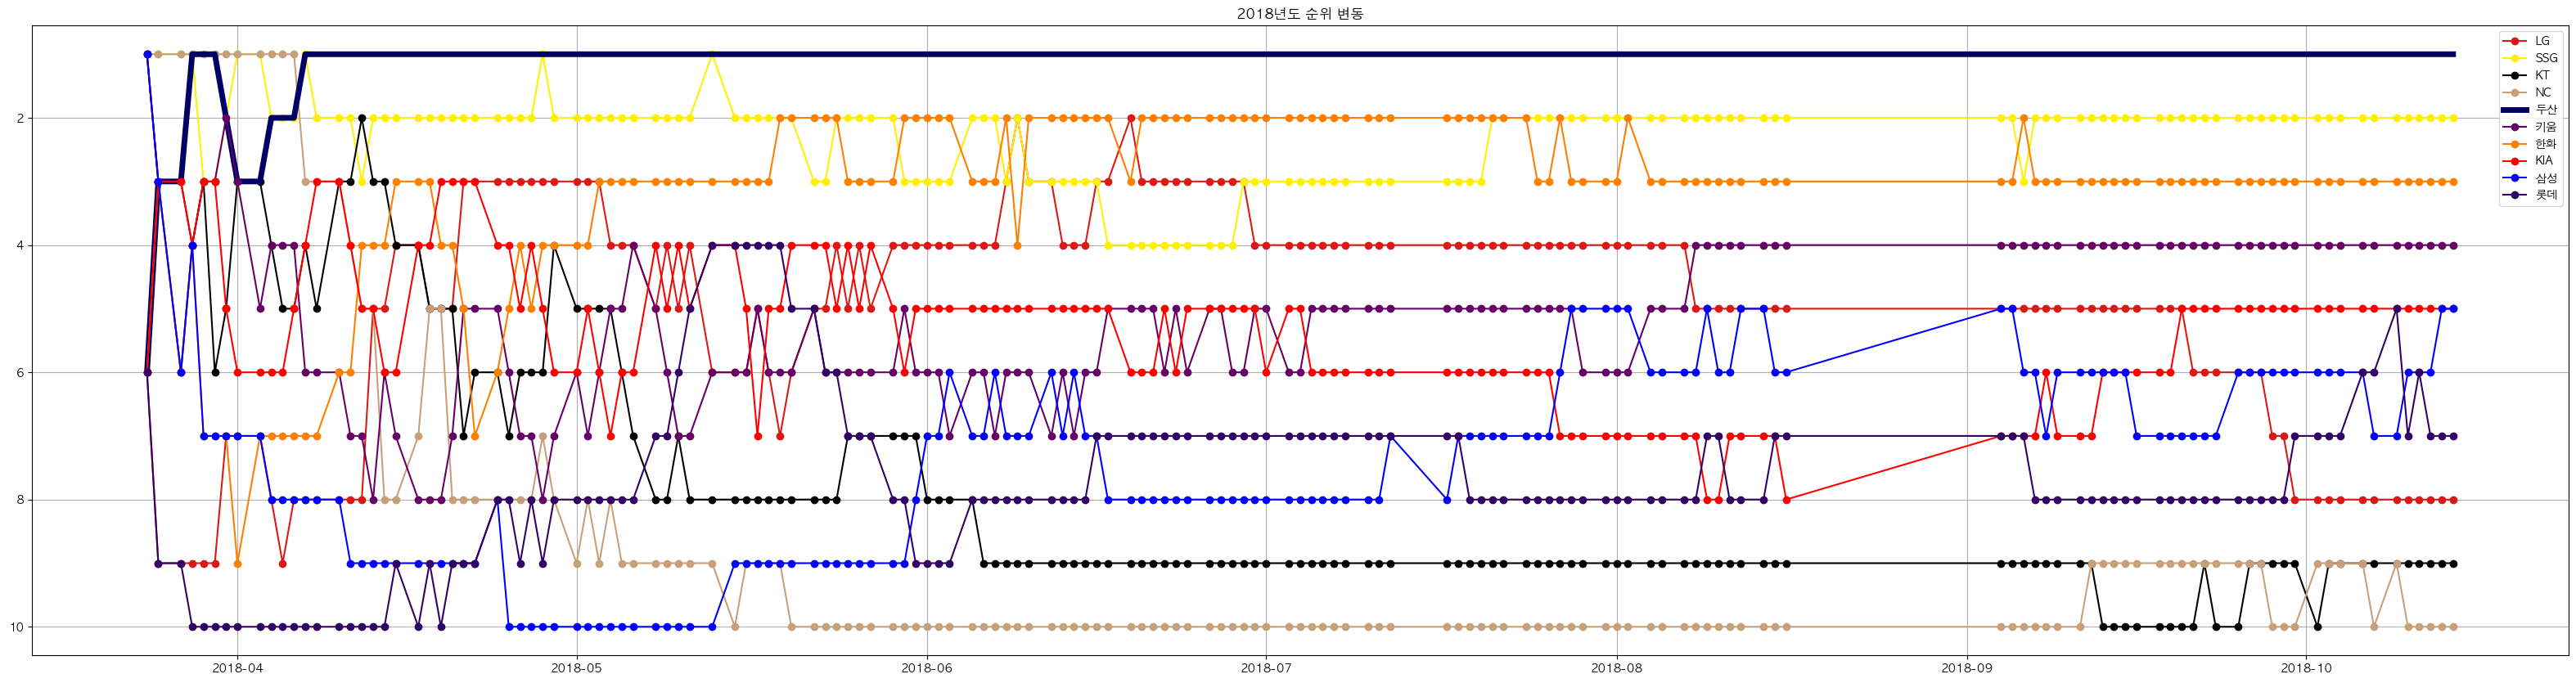

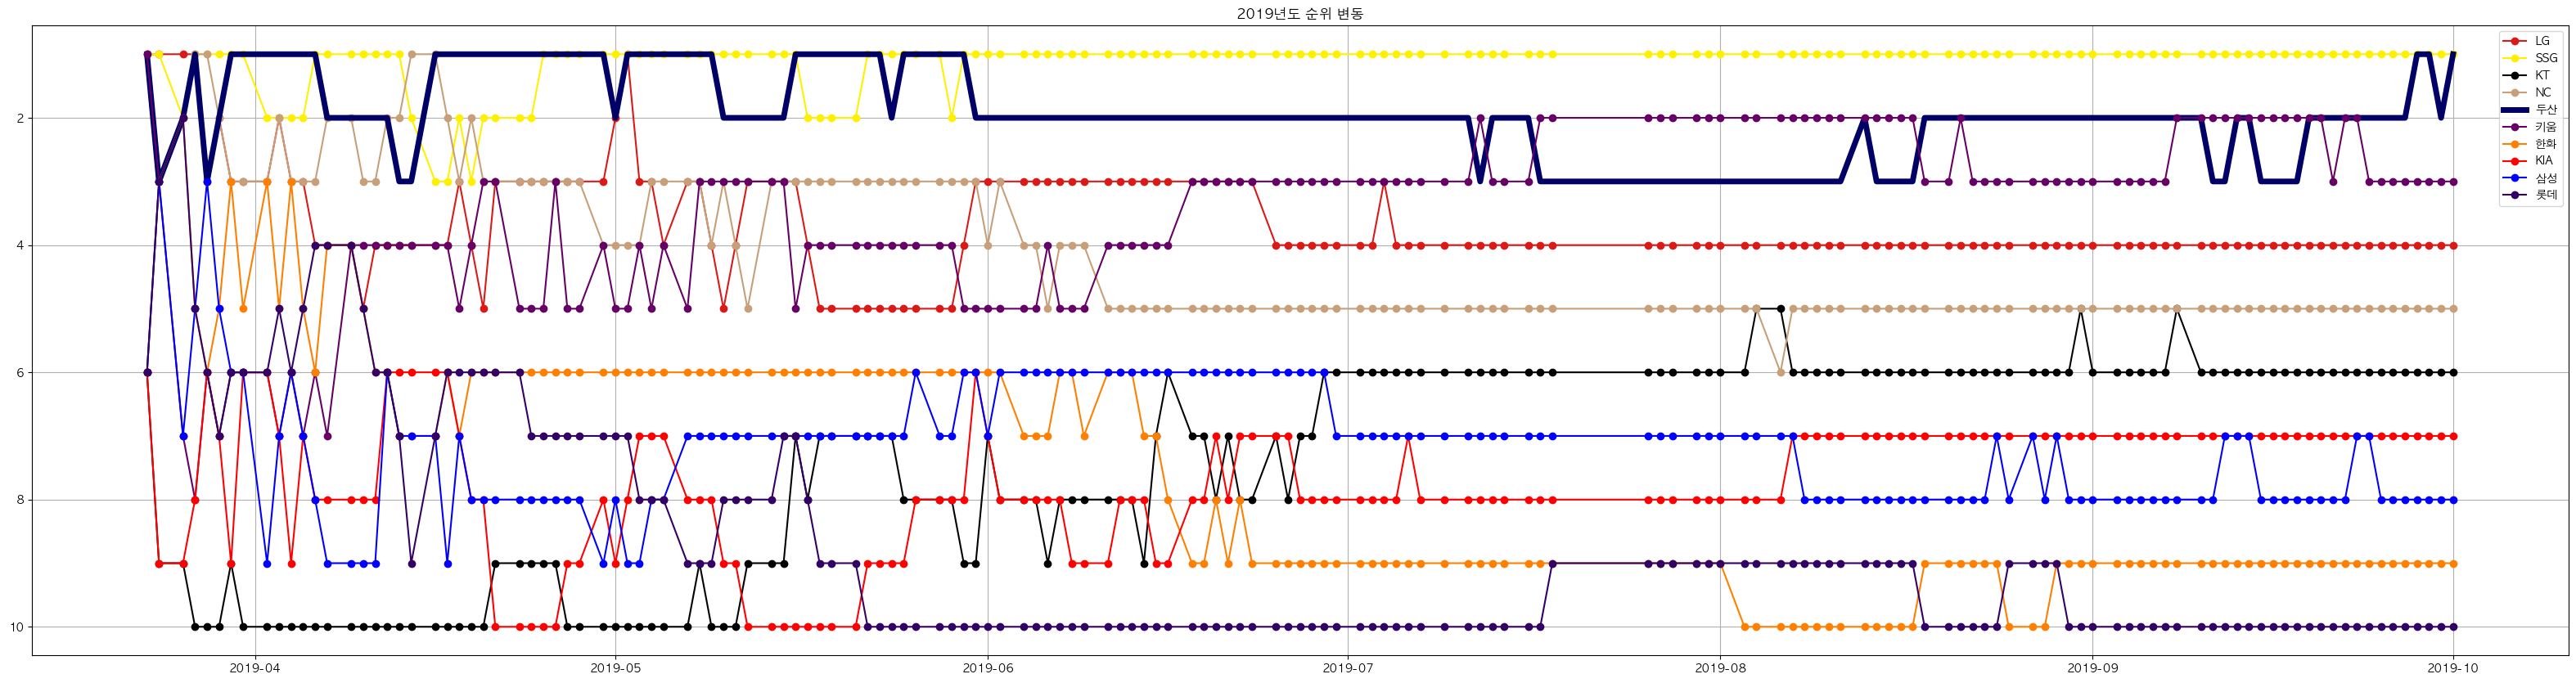

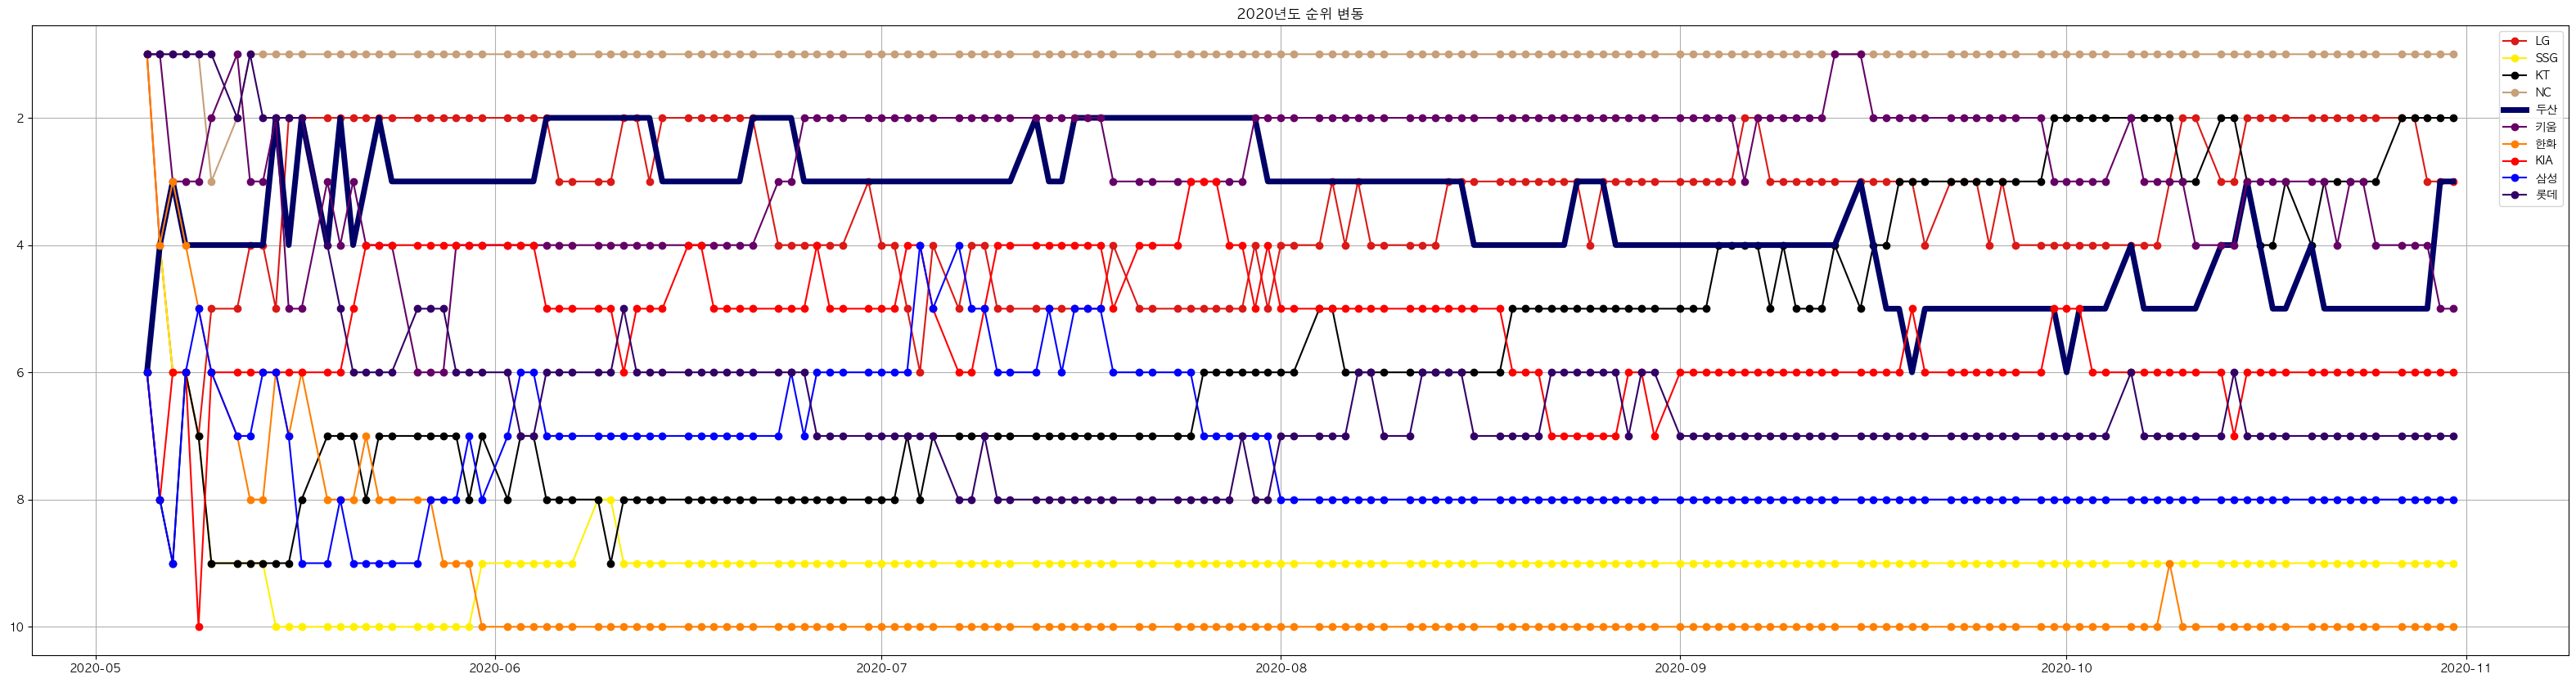

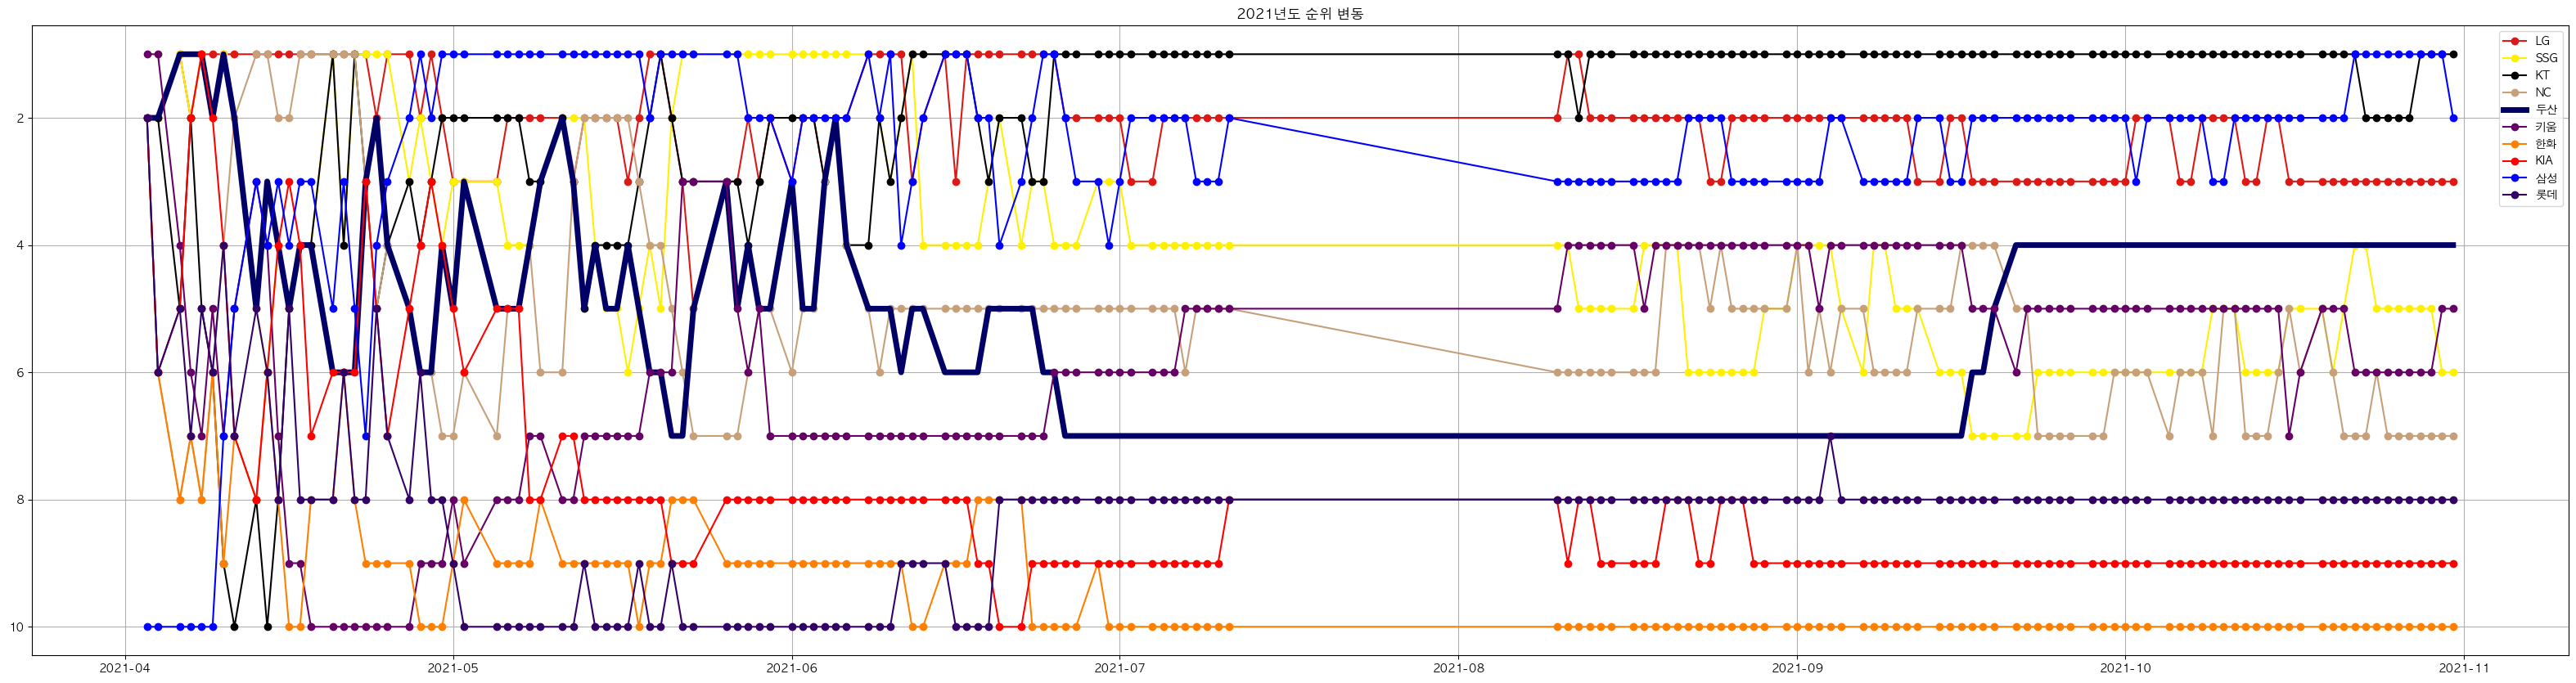

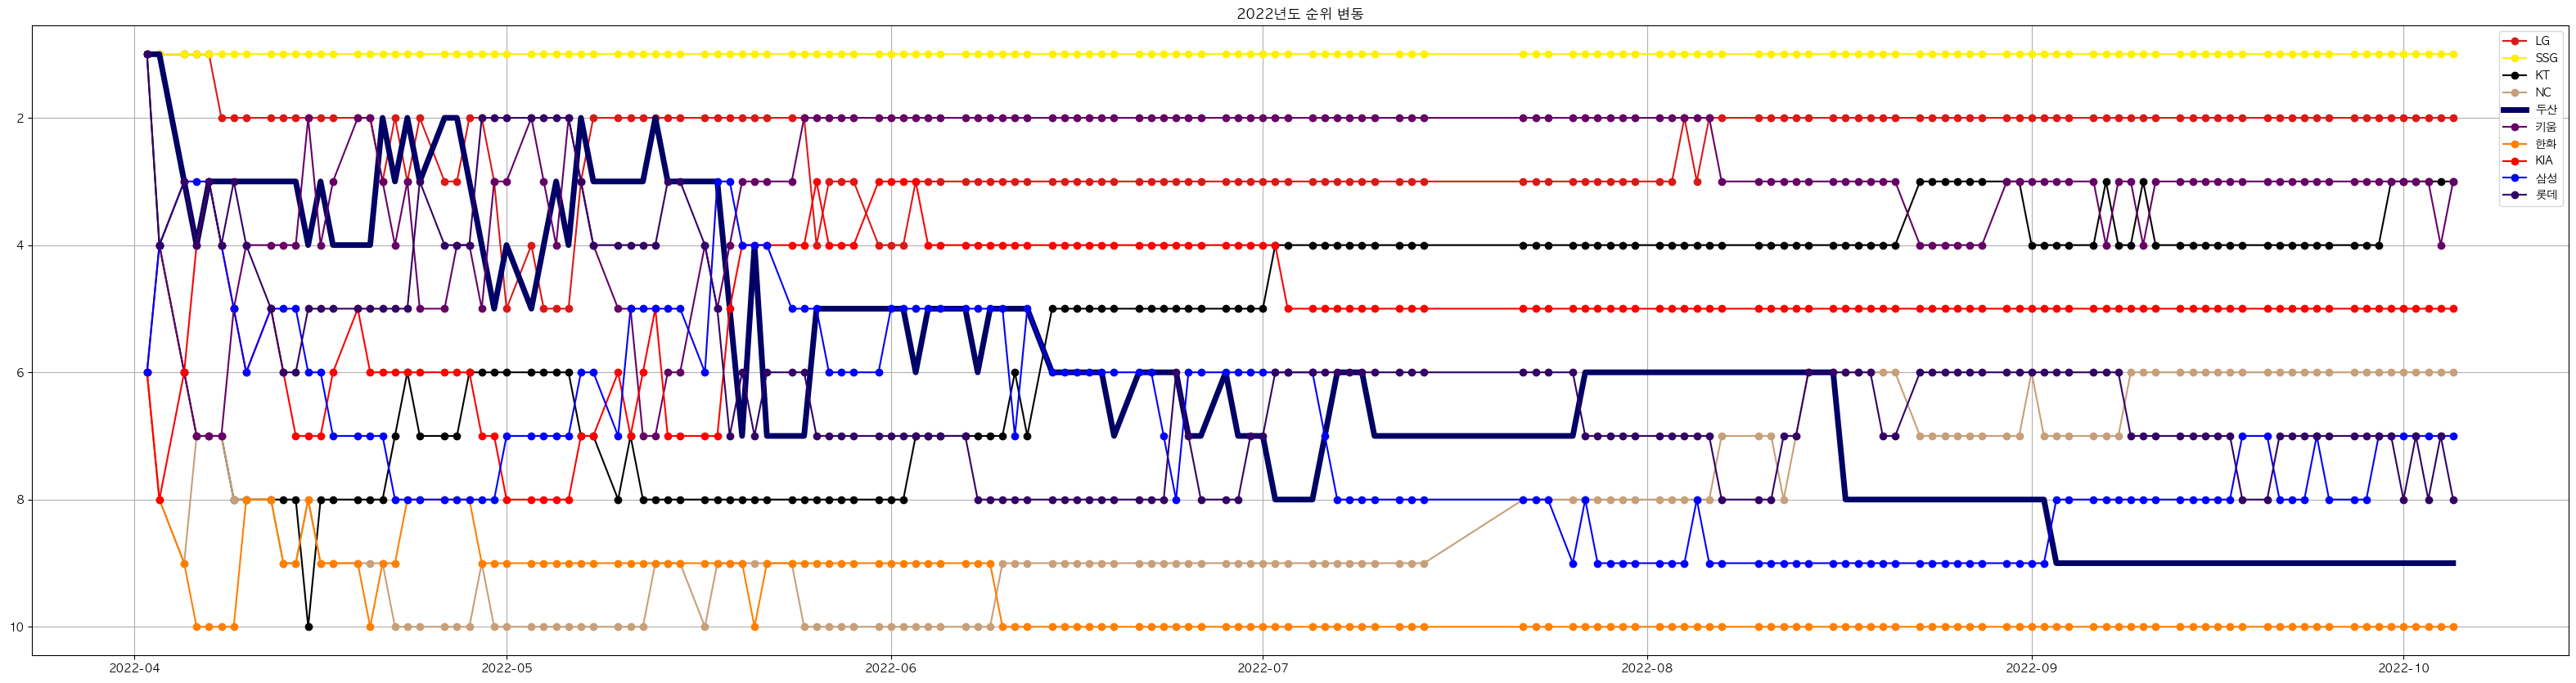

In [9]:
for year in year_list:
    rank_list = os.listdir("./re_rank/{}".format(year))
    sorted_rank = natsort.natsorted(rank_list)

    for team, color in zip(team_list, color_list):
        df_result = pd.DataFrame(columns=["경기수", "승리", "무승부", "패배","득점","실점","승점", "게임차", "순위", "일자"])
        for file in sorted_rank:
            if file == '.DS_store':
                continue
            date = datetime.strptime("{}.{}".format(year, file.replace('.csv', '')), '%Y.%m.%d')
            rank_df=pd.read_csv("./re_rank/{}/{}".format(year, file), index_col=0)
            rank_df["일자"] = date

            rank_list = list(rank_df.loc[team, :])
            df_result.loc[len(df_result)] = rank_list
        plt.gcf().set_size_inches(40, 10)
        if team == "두산":
            plt.plot(df_result["일자"], df_result["순위"], label=team, color=color, linewidth=5.0)
            continue
        plt.plot(df_result["일자"], df_result["순위"], label=team, color=color, marker='o')
    plt.title("{}년도 순위 변동".format(year))
    plt.grid()
    plt.legend(loc='best')
    plt.gca().invert_yaxis()
    plt.savefig("./img/{}.png".format(year), dpi=500)
    plt.show()